In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import the data from medical_examination.csv and assign it to the df variable.

In [9]:
df = pd.read_csv("./data/medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [10]:
# columns 'weight' (kg) and 'height' (cm) exist
BMI = df["weight"] / ((df["height"] / 100) ** 2)

# overweight column: 1 if BMI > 25, else 0
df["overweight"] = (BMI > 25).astype(int)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
Draw the Categorical Plot in the draw_cat_plot function.

In [11]:
# normalize cholesterol
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)

# normalize gluc
df["gluc"] = (df["gluc"] > 1).astype(int)

print(df[["cholesterol", "gluc"]].head())

   cholesterol  gluc
0            0     0
1            1     0
2            1     0
3            0     0
4            0     0


### Draw the Categorical Plot.

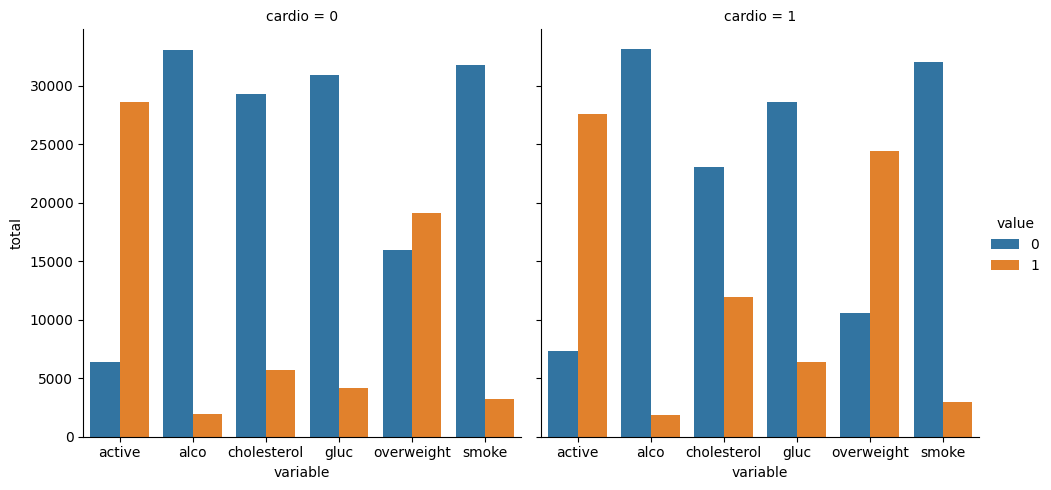

In [12]:
# Prepare data for categorical plot
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
)

# Group and reformat data
df_cat = (
    df_cat
    .groupby(["cardio", "variable", "value"])
    .size()
    .reset_index(name="total")
)

# Draw the catplot
fig = sns.catplot(
    data=df_cat,
    x="variable", y="total", hue="value",
    col="cardio", kind="bar"
)

fig

### Draw the Heat Map

<Axes: >

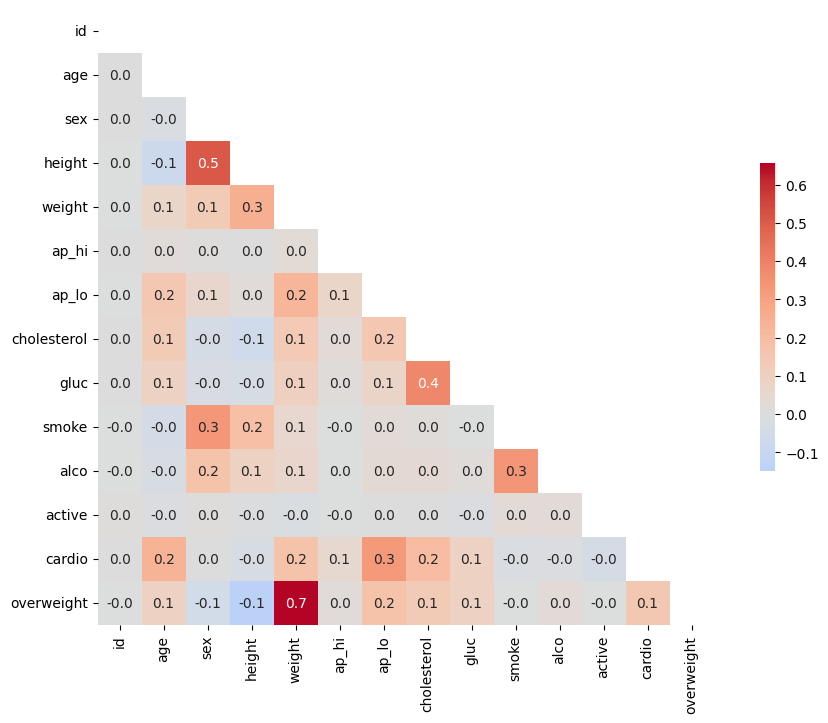

In [14]:
# Step 1: Clean the data
df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) &                                   # diastolic <= systolic
    (df["height"] >= df["height"].quantile(0.025)) &                 # height >= 2.5th percentile
    (df["height"] <= df["height"].quantile(0.975)) &                 # height <= 97.5th percentile
    (df["weight"] >= df["weight"].quantile(0.025)) &                 # weight >= 2.5th percentile
    (df["weight"] <= df["weight"].quantile(0.975))                   # weight <= 97.5th percentile
]

# Step 2: Calculate correlation matrix
corr = df_heat.corr()

# Step 3: Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 4: Set up matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Step 5: Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,          # show values inside cells
    fmt=".1f",           # format to 1 decimal
    center=0,            # center around 0
    cmap="coolwarm",     # diverging colormap
    square=True,         # square cells
    cbar_kws={"shrink": 0.5}
)
